In [1]:
# 1.가장많이 사용된 알파벳 문자를 구하시오 birth 빼고
# (전체, 성별))
# 2. 이름 첫 글자 유행 분석
# 3. 연도별 성별에 따른 이름의 평균 글자 길이를 구하고, 시각화 
# 1880 남자 : 6.5 여자 5.7
# 2010  ~~      ~~~
# 4. 모음의 변화 분석하기 (aeiou) : 이름을 구성하는 문자 중에서 모음의 비율 변화
# 5. 각 연도별로 가장 인기 있는이름들을 추출하여 파일로 저장
# 예시 )
#         F    M
# 1880 Mary   John
# ~~~
# 2010 ~~~    ~~
#6. 추천시스템(영화)
import pandas as pd

In [2]:
columns = ['name','sex','births']
pieces =[] 
for year in range(1880,2011):
    frame = pd.read_csv('babynames/yob%d.txt'% year, names= columns)
    frame['year'] =year
    pieces.append(frame)

names =pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [3]:
# 1.가장많이 사용된 알파벳 문자를 구하시오 birth 빼고
# (전체, 성별))

#전체
lowNames = names.name.str.lower()
nameMerge = ''.join(lowNames)
nlist = pd.Series(nameMerge).str.split('')
pd.Series(nlist[0]).value_counts().index[0]

#남자만
names['lowName'] = lowNames
M = names[names['sex']=='M'].lowName
M_nameMerge = ''.join(M)
Mlist = pd.Series(M_nameMerge).str.split('')
pd.Series(Mlist[0]).value_counts().index[0]

#여자만
F = names[names['sex']=='F'].lowName
F_nameMerge = ''.join(F)
Flist = pd.Series(F_nameMerge).str.split('')
pd.Series(Flist[0]).value_counts().index[0]


'a'

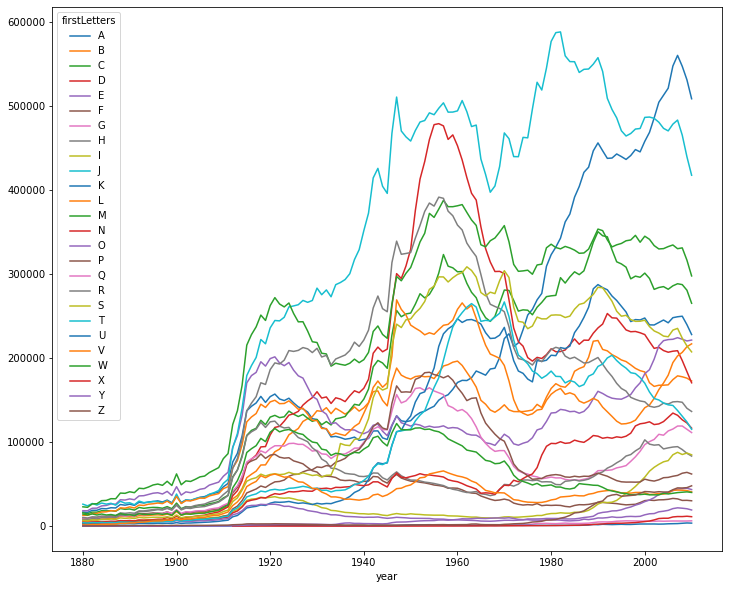

In [4]:
# 2. 이름 첫 글자 유행 분석
getFirstLetter=lambda x : x[0]
firstLetters = names.name.map(getFirstLetter)
firstLetters.name='firstLetters'
firstLetters
firstLetters_show=names.pivot_table('births',index=['year'], columns=firstLetters, aggfunc=sum)
firstLetters_show.plot(figsize=(12,10))

sex          F         M
year                    
1880  5.773885  5.634216
1881  5.750533  5.602808
1882  5.805447  5.647862
1883  5.771347  5.621359
1884  5.795222  5.633778
...        ...       ...
2006  6.320252  6.087788
2007  6.315595  6.085567
2008  6.326166  6.065387
2009  6.324057  6.059949
2010  6.321708  6.048303

[131 rows x 2 columns]


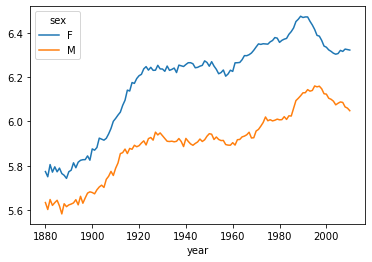

In [5]:
# 3. 연도별 성별에 따른 이름의 평균 글자 길이를 구하고, 시각화 
# 1880 남자 : 6.5 여자 5.7
# 2010  ~~      ~~~
names['len']=names.name.str.len()
names
namelen =names.pivot_table('len',index='year',columns='sex',aggfunc='mean')
print(namelen)
namelen.plot()


year
1880    0.426287
1881    0.427091
1882    0.427407
1883    0.430536
1884    0.427341
          ...   
2006    0.427939
2007    0.428109
2008    0.426850
2009    0.426260
2010    0.425497
Name: propVowel, Length: 131, dtype: float64


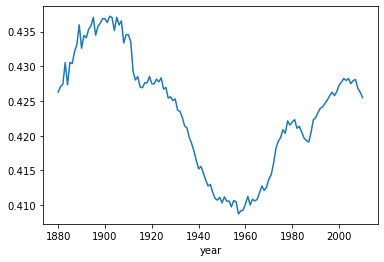

In [6]:
# 4. 모음의 변화 분석하기 (aeiou) : 이름을 구성하는 문자 중에서 모음의 비율 변화
names['name']=names.name.str.lower()
names['count']=names.name.str.count('a')+names.name.str.count('e')+names.name.str.count('i')+names.name.str.count('o')+names.name.str.count('u')
names['propVowel']=names['count']/names['len']
names
vowel = names.groupby('year')['propVowel'].mean()
print(vowel)
vowel.plot()

In [ ]:
# 5. 각 연도별로 가장 인기 있는이름들을 추출하여 파일로 저장
# 예시 )
#         F    M
# 1880 Mary   John
# ~~~
# 2010 ~~~    ~~
columns = ['name','sex','births']
pieces =[] 
for year in range(1880,2011):
    frame = pd.read_csv('babynames/yob%d.txt'% year, names= columns)
    frame['year'] =year
    pieces.append(frame)

names =pd.concat(pieces, ignore_index=True)
names



def getTop(group):
    return group.sort_values('births', ascending=False)[:1]

top =names.groupby(['year','sex']).apply(getTop)
top.reset_index(drop =True,inplace=True)
top
top2 = top.pivot_table('name', index='year',columns='sex',aggfunc=max)
top2.to_csv('topname.csv')